# Analyse Gemiddeld 4

Wordt er in de eerste helft significant meer of minder gescoord dan in de tweede helft?

Bereken over alle seizoenen heen het totaal aantal goals in de eerste helft en in de tweede helft. 

Hou waar mogelijk géén rekening met goals in de toegevoegde tijd omdat dit een vertekend beeld zou kunnen geven.


In [9]:
# Importing the necessary packages
import pandas as pd
from scipy.stats import chisquare 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Laad de data
doelpunten_data = pd.read_csv(r"C:\Users\Robbe\Documents\School_jaar_2\sem2\DEP\doelpunten.csv", sep=";")

Totaal aantal doelpunten in de eerste helft: 17684
Totaal aantal doelpunten in de tweede helft: 23276
Chi-kwadraat waarde: 763.4390625
P-waarde: 4.800647314194788e-168


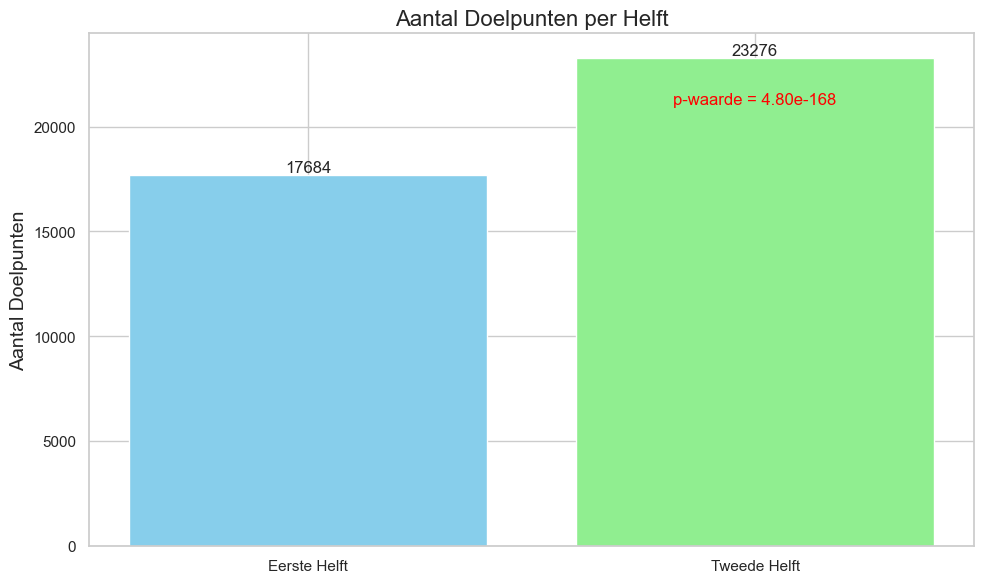

In [11]:
# Identificeer doelpunten in de eerste en tweede helft
doelpunten_1e_helft = doelpunten_data[doelpunten_data['MinDoelpunt'] <= 45]
doelpunten_2e_helft = doelpunten_data[(doelpunten_data['MinDoelpunt'] > 45) & (doelpunten_data['MinDoelpunt'] <= 90)]

# Bereken het totaal aantal doelpunten in de eerste en tweede helft
totaal_doelpunten_1e_helft = len(doelpunten_1e_helft)
totaal_doelpunten_2e_helft = len(doelpunten_2e_helft)

# Bereken verwachte doelpunten (gelijke verdeling)
totaal_doelpunten = totaal_doelpunten_1e_helft + totaal_doelpunten_2e_helft
verwachte_doelpunten = [totaal_doelpunten / 2, totaal_doelpunten / 2]

# Voer de chi-kwadraat Goodness of Fit test uit
chi2, p = chisquare(f_obs=[totaal_doelpunten_1e_helft, totaal_doelpunten_2e_helft], f_exp=verwachte_doelpunten)

print(f"Totaal aantal doelpunten in de eerste helft: {totaal_doelpunten_1e_helft}")
print(f"Totaal aantal doelpunten in de tweede helft: {totaal_doelpunten_2e_helft}")
print(f"Chi-kwadraat waarde: {chi2}")
print(f"P-waarde: {p}")


# Stel Seaborn stijl in voor mooiere plots
sns.set(style="whitegrid")

# Doelpunten en labels voor de plot
doelpunten_aantallen = [totaal_doelpunten_1e_helft, totaal_doelpunten_2e_helft]
labels = ['Eerste Helft', 'Tweede Helft']
colors = ['skyblue', 'lightgreen']

# Maak een staafdiagram
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, doelpunten_aantallen, color=colors)

# Voeg een titel en labels toe
plt.title('Aantal Doelpunten per Helft', fontsize=16)
plt.ylabel('Aantal Doelpunten', fontsize=14)

# Annoteer de bars met het exacte aantal doelpunten
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=12)

# Annoteer de plot met de p-waarde
plt.text(1, max(doelpunten_aantallen) - max(doelpunten_aantallen)/10, f'p-waarde = {p:.2e}', ha='center', va='bottom', fontsize=12, color='red')

plt.tight_layout()
plt.show()